In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:

X = np.array([5.5, 6.0, 6.5, 6.0, 5.0, 6.5, 4.5, 5]).reshape(-1, 1)
Y = np.array([420, 380, 350, 400, 440, 380, 450, 420])

# Initialisation du modèle
model = LinearRegression()

# Ajustement du modèle sur les données
model.fit(X, Y)

# Prédictions
Ypred = model.predict(X)

#Calcul de l'erreur quadratique moyenne
mse = mean_squared_error(Y, Ypred)

# Coefficient de détermination (R²)
score = model.score(X, Y)

In [3]:
print("L'erreur quadratique moyenne avec fit_intercept=True est:", mse)
print("Coefficient (coef) avec fit_intercept=True :", model.coef_)
print("Ordonnée à l'origine (intercept)avec fit_intercept=True :", model.intercept_)
print("Coefficient de détermination (R²) avec fit_intercept=True :", score)

L'erreur quadratique moyenne avec fit_intercept=True est: 121.77419354838715
Coefficient (coef) avec fit_intercept=True : [-42.58064516]
Ordonnée à l'origine (intercept)avec fit_intercept=True : 644.516129032258
Coefficient de détermination (R²) avec fit_intercept=True : 0.8782258064516129


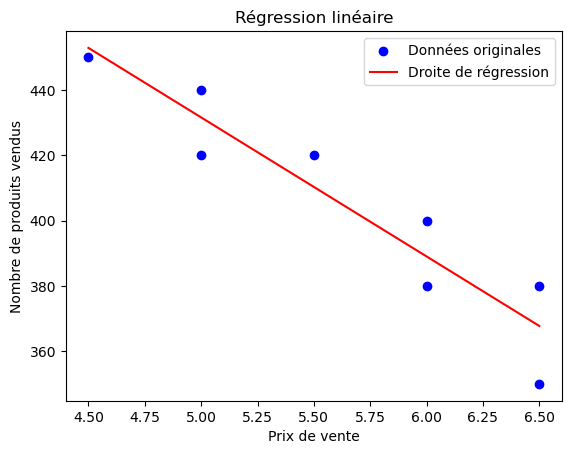

In [4]:
# Affichage du nuage de points
plt.scatter(X, Y, color='blue', label='Données originales')

# Utilisation des attributs pour tracer la droite de régression
# Créer des valeurs de x pour tracer la droite
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range = model.coef_[0] * x_range + model.intercept_

# Affichage de la droite de régression
plt.plot(x_range, y_range, color='red', label='Droite de régression')

# Titres et labels
plt.title('Régression linéaire')
plt.xlabel('Prix de vente')
plt.ylabel('Nombre de produits vendus')
plt.legend()

# Afficher le graphique
plt.show()

In [5]:
model_no_intercept = LinearRegression(fit_intercept=False)

# Ajustement et prédictions
model_no_intercept.fit(X, Y)

y_pred_no_intercept = model_no_intercept.predict(X)
mse_no_intercept = mean_squared_error(Y, y_pred_no_intercept)
score_no_intercept = model_no_intercept.score(X, Y)

In [6]:
print("Coefficient (coef) avec fit_intercept=False :", model_no_intercept.coef_)
print("Ordonnée à l'origine (intercept) avec fit_intercept=False :", model_no_intercept.intercept_)
print("Erreur quadratique moyenne avec fit_intercept=False :", mse_no_intercept)
print("Coefficient de détermination (R²) avec fit_intercept=False :", score_no_intercept)

Coefficient (coef) avec fit_intercept=False : [70.27237354]
Ordonnée à l'origine (intercept) avec fit_intercept=False : 0.0
Erreur quadratique moyenne avec fit_intercept=False : 6385.116731517507
Coefficient de détermination (R²) avec fit_intercept=False : -5.385116731517507


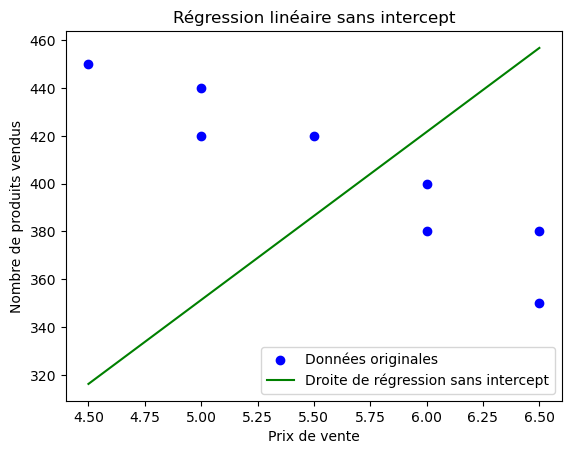

In [7]:
# Affichage
plt.scatter(X, Y, color='blue', label='Données originales')
x_range_no_intercept = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range_no_intercept = model_no_intercept.coef_[0] * x_range_no_intercept  # Pas d'intercept
plt.plot(x_range_no_intercept, y_range_no_intercept, color='green', label='Droite de régression sans intercept')
plt.title('Régression linéaire sans intercept')
plt.xlabel('Prix de vente')
plt.ylabel('Nombre de produits vendus')
plt.legend()
plt.show()

In [8]:
# Stockage des données du fichier eucalyptus dans un tableau retourné par la méthode loadtxt
data = np.loadtxt('/Users/selmafanani/Downloads/eucalyptus.txt')
h = data[:, 0]  # Colonne 'Hauteur'
c = data[:, 1]  # Colonne 'Circonférence'

Erreur quadratique moyenne (MSE) : 1.5366609348103804


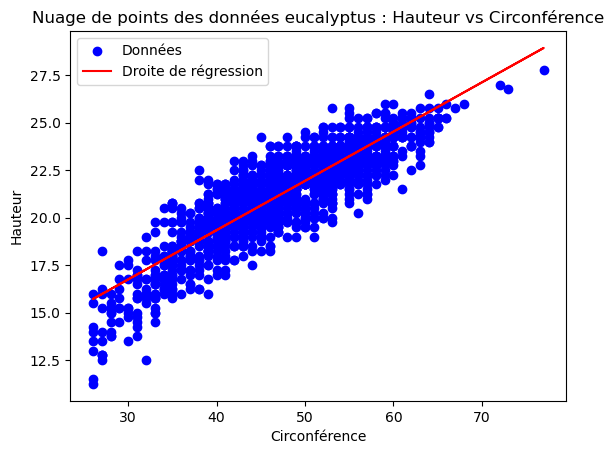

In [9]:
# Affichage du nuage de points
plt.scatter(c, h, color='blue', label="Données")

plt.xlabel("Circonférence")
plt.ylabel("Hauteur")
plt.title("Nuage de points des données eucalyptus : Hauteur vs Circonférence")

# Effectuer la régression linéaire sur nos données en prenant 20% pour le test et 80% pour l'entraînement
X_train, X_test, y_train, y_test = train_test_split(c.reshape(-1, 1), h, test_size=0.2, random_state=42)

# Créer notre modèle
model = LinearRegression()

# Effectuer l'apprentissage sur nos données
model.fit(X_train, y_train)

# Prédire sur les données de test (les 20% restants)
y_pred = model.predict(X_test)

# Calcul de l'erreur quadratique moyenne
mse = mean_squared_error(y_test, y_pred)
print(f"Erreur quadratique moyenne (MSE) : {mse}")

# Maintenant, représenter la droite de régression sur le graphique
# On prédit les valeurs de circonférence (c) pour toutes les hauteurs (h)
h_pred_line = model.predict(c.reshape(-1, 1))

# Tracer la droite de régression
plt.plot(c, h_pred_line, color='red', label="Droite de régression")

# Afficher la légende et le graphique
plt.legend()
plt.show()   

Coefficient de détermination R²: 0.7883255976602649
Erreur quadratique moyenne (MSE) : 1.3615411967970183
Coefficient de détermination R²: 0.769812754249977
Erreur quadratique moyenne (MSE) : 1.5299835311242707
Coefficient de détermination R²: 0.7502123632996368
Erreur quadratique moyenne (MSE) : 1.5395496205630723
Coefficient de détermination R²: 0.785125023836594
Erreur quadratique moyenne (MSE) : 1.417011656782984
Coefficient de détermination R²: 0.7526584110576597
Erreur quadratique moyenne (MSE) : 1.4642393157392477
Coefficient de détermination R²: 0.7112228100589271
Erreur quadratique moyenne (MSE) : 1.7452721637292115
Coefficient de détermination R²: 0.7709600460476836
Erreur quadratique moyenne (MSE) : 1.353721199488056
Coefficient de détermination R²: 0.7645233941318268
Erreur quadratique moyenne (MSE) : 1.3105153246219676
Coefficient de détermination R²: 0.7994060023279203
Erreur quadratique moyenne (MSE) : 1.516300692531067
Coefficient de détermination R²: 0.7932771660814512

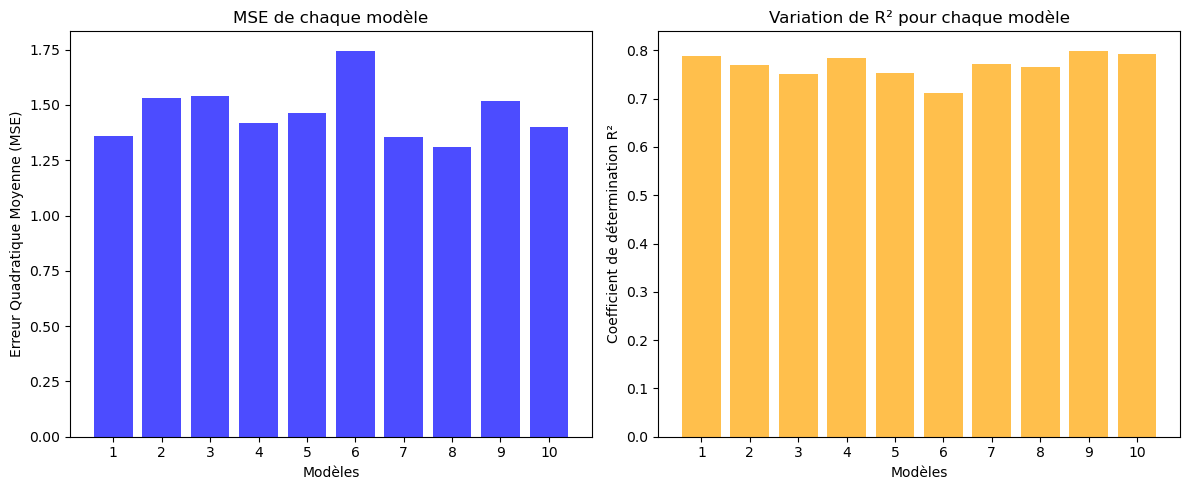

In [10]:
#on utilise maintenant la méthode hold-out en créant 10 modèles qui vont apprendre et tester sur des ensemble différents 

# Générer une liste de 10 valeurs uniques aléatoires entre 1 et 99
random_states = random.sample(range(1, 100), 10)


# Initialiser des listes pour stocker les résultats
mse_list = []
r_squared_list = []

for i in random_states :
    X_train, X_test, y_train, y_test = train_test_split(c.reshape(-1, 1), h, test_size=0.2, random_state=i)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    mse_list.append(mse)
    r_squared_list.append(r_squared)
    print(f"Coefficient de détermination R²: {r_squared}")
    print(f"Erreur quadratique moyenne (MSE) : {mse}")

# Nous représentons les valeurs MSE et r_squared dans chaque graph en fonction du modèle créé

# Tracer les MSE pour chaque modèle
plt.figure(figsize=(12, 5))

# Graphique 1 : MSE
plt.subplot(1, 2, 1)
plt.bar(range(1, 11), mse_list, color='blue', alpha=0.7)
plt.xticks(range(1, 11), [f'{i}' for i in range(1, 11)])
plt.xlabel("Modèles")
plt.ylabel("Erreur Quadratique Moyenne (MSE)")
plt.title("MSE de chaque modèle")

# Graphique 2 : Coefficient de détermination R²
plt.subplot(1, 2, 2)
plt.bar(range(1, 11), r_squared_list, color='orange', alpha=0.7)
plt.xticks(range(1, 11), [f'{i}' for i in range(1, 11)])
plt.xlabel("Modèles")
plt.ylabel("Coefficient de détermination R²")
plt.title("Variation de R² pour chaque modèle")

# Afficher les graphiques
plt.tight_layout()
plt.show()   

R² pour chaque pli : [0.76181626 0.61207803 0.77468714 0.79519573 0.74966862 0.6451756
 0.7367244  0.65961124 0.81620739 0.69098471]
R² moyen : 0.7242149112609425
MSE pour chaque pli : [16.61199112 19.92237036 14.05677218 17.82138701 12.6764949  19.17380905
 12.88110234 25.26327454 16.42212033 14.01475668]
MSE moyen : 16.88440785221873


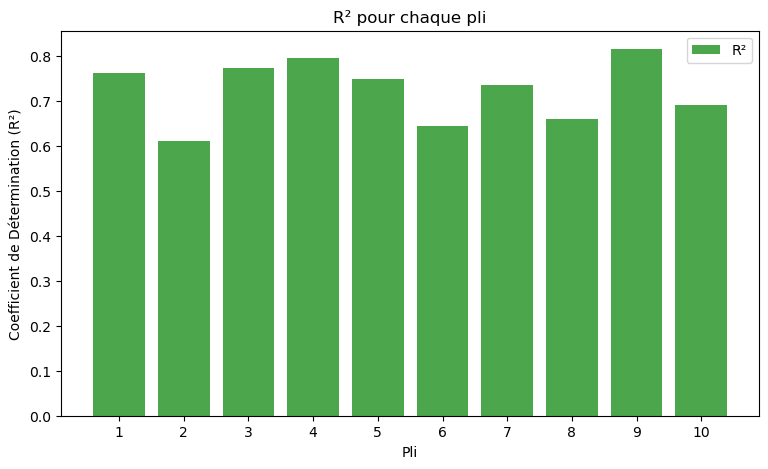

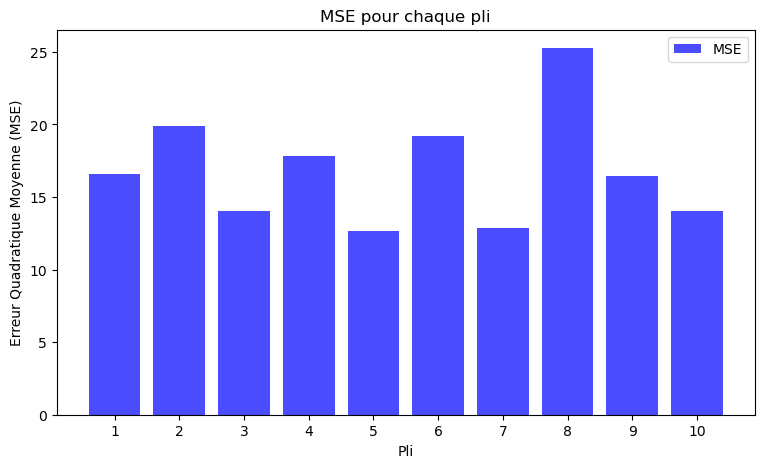

In [11]:
# Utilisation de la méthode par validation coisée de sklearn : cross_val_score pour évaluer le modèle
# 'neg_mean_squared_error' est utilisé car les scores sont retournés sous forme négative pour les métriques de perte


# On remarque que la méthode qui utilise la validation croisée montre une plus grande variation de la valeur MSE entre les differents modèle par rapport a la méthode hold elle va donc 
# nous permettre d'obtenir une meilleur estimation du modèle qui va le mieux nous convernir 

 # Création du modèle
model = LinearRegression()

# Effectuer la validation croisée avec scoring pour R²
r_squared_scores = cross_val_score(model, h.reshape(-1, 1), c, scoring='r2', cv=10)

# Calculer le MSE pour chaque pli
mse_scores = -cross_val_score(model, h.reshape(-1, 1), c, scoring='neg_mean_squared_error', cv=10)


# Afficher les résultats
print(f"R² pour chaque pli : {r_squared_scores}")
print(f"R² moyen : {np.mean(r_squared_scores)}")
print(f"MSE pour chaque pli : {mse_scores}")
print(f"MSE moyen : {np.mean(mse_scores)}")

plt.figure(figsize=(9, 5))
plt.bar(range(1, 11), r_squared_scores, color='green', alpha=0.7, label='R²')
plt.xticks(range(1, 11))
plt.xlabel("Pli")
plt.ylabel("Coefficient de Détermination (R²)")
plt.title("R² pour chaque pli")
plt.legend()

plt.figure(figsize=(9, 5))
plt.bar(range(1, 11), mse_scores, color='blue', alpha=0.7, label='MSE')
plt.xticks(range(1, 11))
plt.xlabel("Pli")
plt.ylabel("Erreur Quadratique Moyenne (MSE)")
plt.title("MSE pour chaque pli")
plt.legend()
plt.show()

In [12]:
# Séparer les colonnes Hauteur et Circonférence
h = data[:, 0]  # Hauteur
c = data[:, 1]  # Circonférence

# Créer et ajuster le modèle de régression linéaire
model = LinearRegression()
model.fit(c.reshape(-1, 1), h)

# Valeur de hauteur pour laquelle nous voulons prédire la circonférence
c_value = 22.8

# Prédire la circonférence pour cette hauteur
predicted_c = model.predict(np.array([[c_value]]))  # Passer h_value sous forme de tableau 2D

# Afficher le résultat
print(f"La hauteur prédite pour une circonférence de {c_value} est : {predicted_c[0]:.2f}")

# Utilisation de np.isclose pour gérer les approximations en flottants
index = np.where(np.isclose(c, c_value, atol=1e-2))[0]

if index.size > 0:
    # Afficher la circonférence correspondante
    true_h = h[index[0]]
    print(f"La circonférence réelle pour une hauteur de {c_value} est : {true_h:.2f}")
else:
    print(f"Aucune circonférence trouvée pour une hauteur de {c_value}.")

La hauteur prédite pour une circonférence de 22.8 est : 14.90
Aucune circonférence trouvée pour une hauteur de 22.8.


In [13]:
# Calculer le logarithme de la circonférence
log_c = np.log(c)

# Ajouter la colonne du logarithme de la circonférence au tableau de données
# Créer un nouveau tableau avec la nouvelle colonne
data_with_log = np.column_stack((h, c, log_c))

print (data_with_log)

[[18.25       36.          3.58351894]
 [19.75       42.          3.73766962]
 [16.5        33.          3.49650756]
 ...
 [20.25       50.          3.91202301]
 [20.25       37.          3.61091791]
 [19.75       40.          3.68887945]]


Modèle avec c : MSE = 1.54, R² = 0.73
Modèle avec log(c) : MSE = 1.48, R² = 0.74


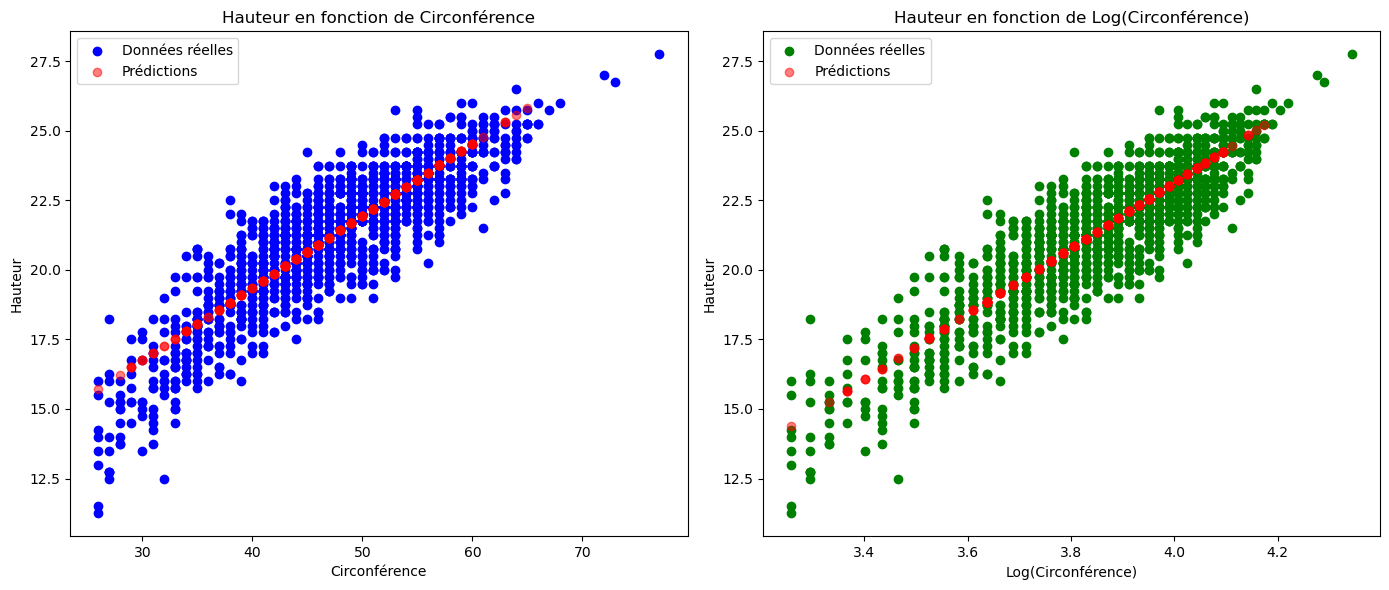

In [14]:
#Charger les données

data = np.loadtxt('/Users/selmafanani/Downloads/eucalyptus.txt')
h = data[:, 0]  # Hauteur
c = data[:, 1]  # Circonférence
log_c = np.log(c)  # Logarithme de la circonférence

# Créer et entraîner les modèles de régression

# Régression avec c
X_c = c.reshape(-1, 1)  # Reshape pour sklearn
X_log_c = log_c.reshape(-1, 1)  # Reshape pour sklearn

# Diviser en ensembles d'entraînement et de test
X_train_c, X_test_c, y_train, y_test = train_test_split(X_c, h, test_size=0.2, random_state=42)
X_train_log_c, X_test_log_c, _, _ = train_test_split(X_log_c, h, test_size=0.2, random_state=42)

# Modèle pour c
model_c = LinearRegression()
model_c.fit(X_train_c, y_train)

# Modèle pour log(c)
model_log_c = LinearRegression()
model_log_c.fit(X_train_log_c, y_train)

# 3. Faire des prédictions avec chacun des deux modèles 
y_pred_c = model_c.predict(X_test_c)
y_pred_log_c = model_log_c.predict(X_test_log_c)

# 4. Évaluer les modèles
mse_c = mean_squared_error(y_test, y_pred_c)
r_squared_c = r2_score(y_test, y_pred_c)

mse_log_c = mean_squared_error(y_test, y_pred_log_c)
r_squared_log_c = r2_score(y_test, y_pred_log_c)

print(f"Modèle avec c : MSE = {mse_c:.2f}, R² = {r_squared_c:.2f}")
print(f"Modèle avec log(c) : MSE = {mse_log_c:.2f}, R² = {r_squared_log_c:.2f}")

# 5. Visualiser les résultats
plt.figure(figsize=(14, 6))

# Scatter plot pour c
plt.subplot(1, 2, 1)
plt.scatter(c, h, color='blue', label='Données réelles')
plt.scatter(X_test_c, y_pred_c, color='red', label='Prédictions', alpha=0.5)
plt.title('Hauteur en fonction de Circonférence')
plt.xlabel('Circonférence')
plt.ylabel('Hauteur')
plt.legend()

# Scatter plot pour log(c)
plt.subplot(1, 2, 2)
plt.scatter(log_c, h, color='green', label='Données réelles')
plt.scatter(X_test_log_c, y_pred_log_c, color='red', label='Prédictions', alpha=0.5)
plt.title('Hauteur en fonction de Log(Circonférence)')
plt.xlabel('Log(Circonférence)')
plt.ylabel('Hauteur')
plt.legend()

plt.tight_layout()
plt.show()

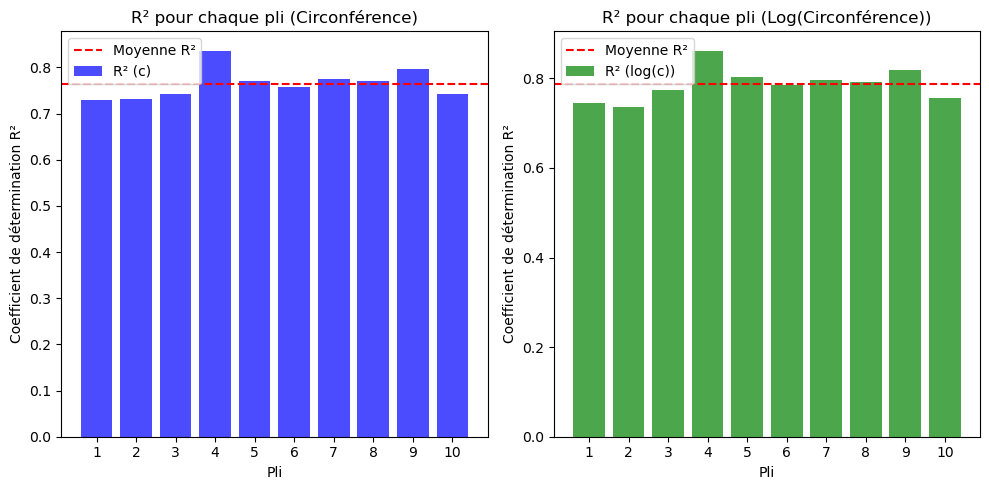

In [15]:
# On refait ce qu'on a fait précedemment
# Charger les données
data = np.loadtxt('/Users/selmafanani/Downloads/eucalyptus.txt')
h = data[:, 0]  # Hauteur
c = data[:, 1]  # Circonférence
log_c = np.log(c)  # Logarithme de la circonférence

# Créer les modèles de régression
model_c = LinearRegression()
model_log_c = LinearRegression()

# Définir la validation croisée
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Coefficients de détermination pour chaque pli
r_squared_c_list = []
r_squared_log_c_list = []

# Validation croisée pour le modèle avec c
for train_index, test_index in kf.split(h):
    X_train, X_test = c[train_index].reshape(-1, 1), c[test_index].reshape(-1, 1)
    y_train, y_test = h[train_index], h[test_index]

    model_c.fit(X_train, y_train)
    y_pred = model_c.predict(X_test)
    r_squared_c = r2_score(y_test, y_pred)
    r_squared_c_list.append(r_squared_c)

# Validation croisée pour le modèle avec log(c)
for train_index, test_index in kf.split(h):
    X_train, X_test = log_c[train_index].reshape(-1, 1), log_c[test_index].reshape(-1, 1)
    y_train, y_test = h[train_index], h[test_index]

    model_log_c.fit(X_train, y_train)
    y_pred = model_log_c.predict(X_test)
    r_squared_log_c = r2_score(y_test, y_pred)
    r_squared_log_c_list.append(r_squared_log_c)

# Afficher les résultats
plt.figure(figsize=(10, 5))

# Tracer R² pour le modèle avec c
plt.subplot(1, 2, 1)
plt.bar(range(1, 11), r_squared_c_list, color='blue', alpha=0.7, label='R² (c)')
plt.xticks(range(1, 11))
plt.xlabel("Pli")
plt.ylabel("Coefficient de détermination R²")
plt.title("R² pour chaque pli (Circonférence)")
plt.axhline(y=np.mean(r_squared_c_list), color='red', linestyle='--', label='Moyenne R²')
plt.legend()

# Tracer R² pour le modèle avec log(c)
plt.subplot(1, 2, 2)
plt.bar(range(1, 11), r_squared_log_c_list, color='green', alpha=0.7, label='R² (log(c))')
plt.xticks(range(1, 11))
plt.xlabel("Pli")
plt.ylabel("Coefficient de détermination R²")
plt.title("R² pour chaque pli (Log(Circonférence))")
plt.axhline(y=np.mean(r_squared_log_c_list), color='red', linestyle='--', label='Moyenne R²')
plt.legend()

# Afficher les graphiques
plt.tight_layout()
plt.show()

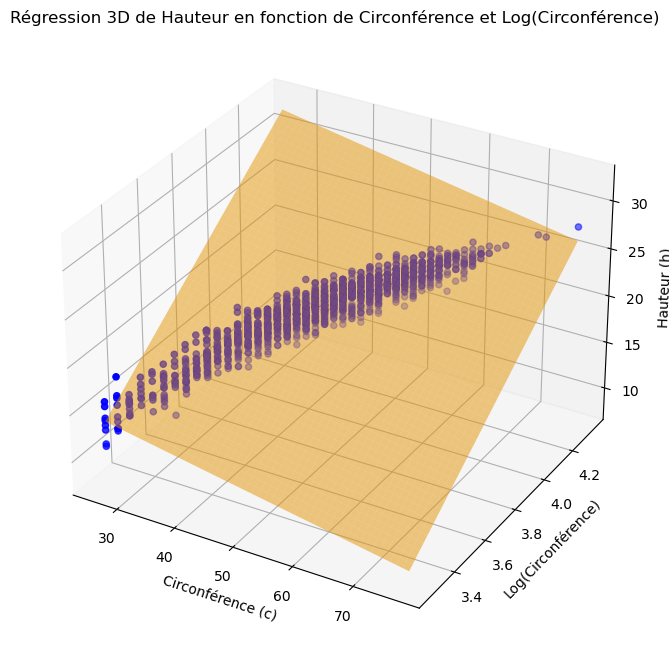

In [16]:

from mpl_toolkits.mplot3d import Axes3D


# Charger les données
data = np.loadtxt('/Users/selmafanani/Downloads/eucalyptus.txt')
h = data[:, 0]  # Hauteur
c = data[:, 1]  # Circonférence
log_c = np.log(c)  # Logarithme de la circonférence

# Créer la matrice de caractéristiques
X = np.column_stack((c, log_c))  # Combine c et log(c) en une matrice de caractéristiques

# Créer et ajuster le modèle de régression linéaire
model = LinearRegression()
model.fit(X, h)

# Faire des prédictions
h_pred = model.predict(X)

# Tracer les données réelles et la surface de régression
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Tracer les points réels
ax.scatter(c, log_c, h, color='blue', label='Données Réelles')

# Créer une grille pour la surface de régression
c_range = np.linspace(min(c), max(c), 50)
log_c_range = np.linspace(min(log_c), max(log_c), 50)
c_grid, log_c_grid = np.meshgrid(c_range, log_c_range)

# Prédire les valeurs de h pour la grille
h_grid = model.predict(np.column_stack((c_grid.ravel(), log_c_grid.ravel()))).reshape(c_grid.shape)

# Tracer la surface de régression
ax.plot_surface(c_grid, log_c_grid, h_grid, color='orange', alpha=0.5)

# Étiquettes et titre
ax.set_xlabel('Circonférence (c)')
ax.set_ylabel('Log(Circonférence)')
ax.set_zlabel('Hauteur (h)')
ax.set_title('Régression 3D de Hauteur en fonction de Circonférence et Log(Circonférence)')
plt.show()


MSE moyen : 1.326209795528777
R² moyen : 0.7336528489553764


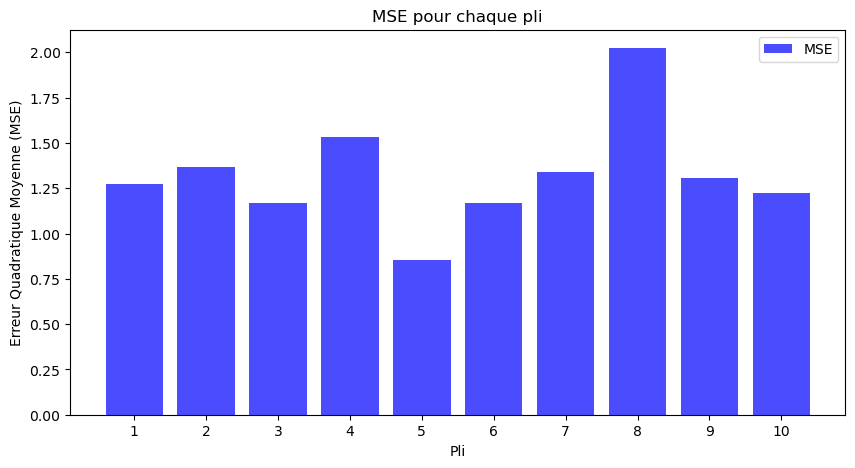

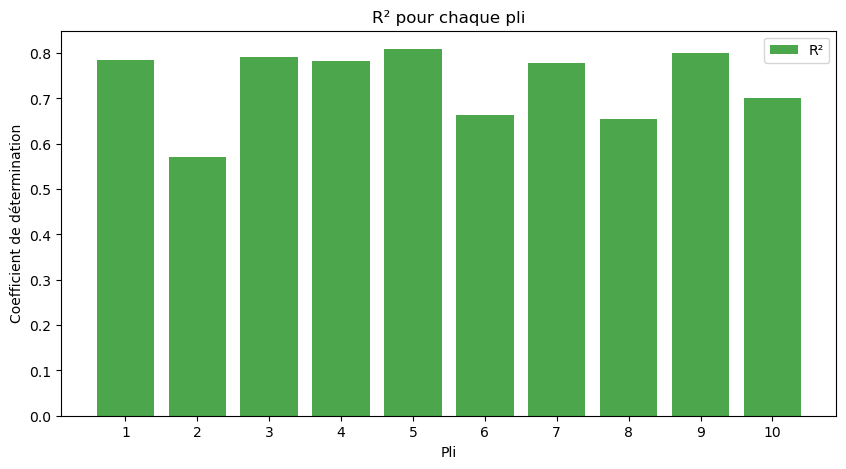

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Charger les données
data = np.loadtxt('/Users/selmafanani/Downloads/eucalyptus.txt')
h = data[:, 0]  # Hauteur
c = data[:, 1]  # Circonférence
log_c = np.log(c)  # Logarithme de la circonférence

# Créer la matrice de caractéristiques
X = np.column_stack((c, log_c))  # Combine c et log(c) en une matrice de caractéristiques

# Créer le modèle de régression linéaire
model = LinearRegression()

# Effectuer la validation croisée avec 10 plis
mse_scores = -cross_val_score(model, X, h, scoring='neg_mean_squared_error', cv=10)
r_squared_scores = cross_val_score(model, X, h, scoring='r2', cv=10)

# Afficher les résultats
print(f"MSE moyen : {np.mean(mse_scores)}")
print(f"R² moyen : {np.mean(r_squared_scores)}")

# Tracer les MSE
plt.figure(figsize=(10, 5))
plt.bar(range(1, 11), mse_scores, color='blue', alpha=0.7, label='MSE')
plt.xticks(range(1, 11))
plt.xlabel("Pli")
plt.ylabel("Erreur Quadratique Moyenne (MSE)")
plt.title("MSE pour chaque pli")
plt.legend()
plt.show()

# Tracer les R2
plt.figure(figsize=(10, 5))
plt.bar(range(1, 11), r_squared_scores, color='green', alpha=0.7, label='R²')
plt.xticks(range(1, 11))
plt.xlabel("Pli")
plt.ylabel("Coefficient de détermination")
plt.title("R² pour chaque pli")
plt.legend()
plt.show()